In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## Данные для анализа

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv


Прочитаем ежеденевно обновляемые данные из ссылки и загрузим себе.

In [208]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [209]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12244,12245,04/05/2020,Wyoming,US,2020-04-05 23:13:44,197.0,0.0,0.0
12245,12246,04/05/2020,Xinjiang,Mainland China,2020-04-05 23:13:44,76.0,3.0,73.0
12246,12247,04/05/2020,Yukon,Canada,2020-04-05 23:13:44,6.0,0.0,0.0
12247,12248,04/05/2020,Yunnan,Mainland China,2020-04-05 23:13:44,184.0,2.0,172.0
12248,12249,04/05/2020,Zhejiang,Mainland China,2020-04-05 23:13:44,1263.0,1.0,1230.0


Выносим дату отдельным столбцом и делаем копии

In [210]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date


Группируем по странам (без провинций) и дате измерения

In [211]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [212]:
COVID.head(30)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              3.0     0.0        0.0
           US                    1.0     0.0        0.0
           Vietnam               2.0     0.0        0.0
2020-01-24 France                2.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      916.0    26.0       36.0
           Singapore             3.0     0.0        0.0

Нарисуем для КИтая

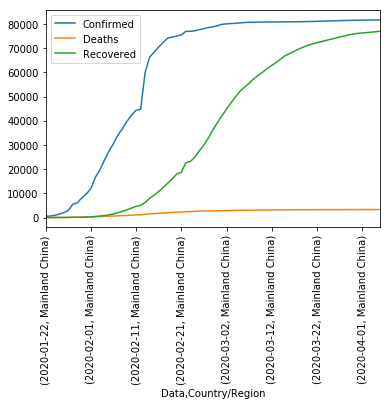

In [189]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Есть какие-то странные места в феврале

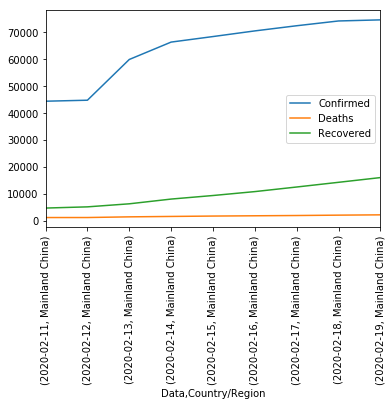

In [195]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')=='Mainland China') & (COVID.index.get_level_values( 'Data') > pd.to_datetime('2020-02-10'))& (COVID.index.get_level_values( 'Data') < pd.to_datetime('2020-02-20'))), ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [204]:
COVID_.loc[( (COVID_[ 'Country/Region']=='Mainland China') & (COVID_['Data'] > pd.to_datetime('2020-02-11'))& (COVID_['Data'] < pd.to_datetime('2020-02-14'))), :].head(50)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
1268,1269,02/12/2020,Hubei,Mainland China,2020-02-12T14:13:08,33366.0,1068.0,2686.0,2020-02-12
1269,1270,02/12/2020,Guangdong,Mainland China,2020-02-12T12:23:09,1219.0,1.0,275.0,2020-02-12
1270,1271,02/12/2020,Henan,Mainland China,2020-02-12T14:13:08,1135.0,8.0,246.0,2020-02-12
1271,1272,02/12/2020,Zhejiang,Mainland China,2020-02-12T10:13:20,1131.0,0.0,321.0,2020-02-12
1272,1273,02/12/2020,Hunan,Mainland China,2020-02-12T12:43:03,946.0,2.0,304.0,2020-02-12
1273,1274,02/12/2020,Anhui,Mainland China,2020-02-12T10:13:20,889.0,4.0,127.0,2020-02-12
1274,1275,02/12/2020,Jiangxi,Mainland China,2020-02-12T01:23:06,844.0,1.0,152.0,2020-02-12
1275,1276,02/12/2020,Jiangsu,Mainland China,2020-02-12T14:13:08,543.0,0.0,125.0,2020-02-12
1276,1277,02/12/2020,Chongqing,Mainland China,2020-02-12T23:13:08,518.0,3.0,102.0,2020-02-12
1277,1278,02/12/2020,Shandong,Mainland China,2020-02-12T11:13:05,497.0,2.0,92.0,2020-02-12


Пока нет дополнительной информации не скажешь, что происходит

In [205]:
COVID.head(20)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0

Сделаем первые разности (производную)

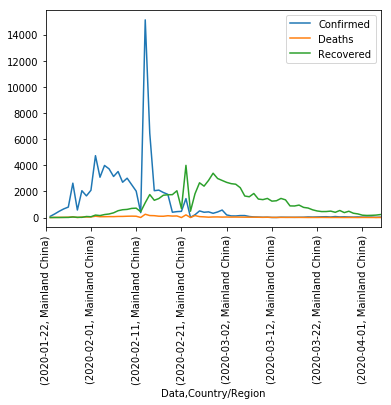

In [206]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Опять большой пик - нужен дополнительный анализ

Посмотрим только на выздоровление (так оптимистичней:))

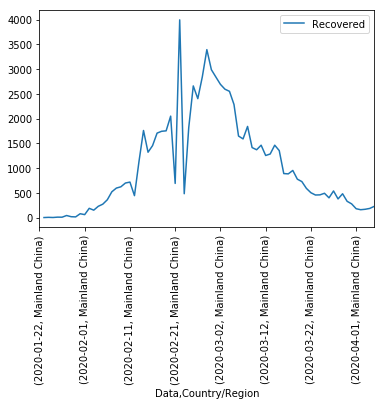

In [207]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Recovered']].diff(1).plot()
plt.xticks(label = COVID1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].diff(1).values, rotation=90)

plt.show()

Странный ход данных сохранился - будем разбираться, что происходит


## Построим признаки

1) Первая разность (производная ряда) - разница с(t)-c(t-1) по всем t 

In [ ]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

2) Сами значения элементов ряда по времени

In [256]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].values 

In [257]:
X1.shape

(75, 3)

In [258]:
X2.shape

(75, 3)

3) Добавим признаков по календарю
   

In [259]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='Mainland China'].index.get_level_values( 'Data')

In [260]:
X3

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31, 2020-02-01, 2020-02-02,
       2020-02-03, 2020-02-04, 2020-02-05, 2020-02-06, 2020-02-07, 2020-02-08,
       2020-02-09, 2020-02-10, 2020-02-11, 2020-02-12, 2020-02-13, 2020-02-14,
       2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 2020-02-19, 2020-02-20,
       2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24, 2020-02-25, 2020-02-26,
       2020-02-27, 2020-02-28, 2020-02-29, 2020-03-01, 2020-03-02, 2020-03-03,
       2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, 2020-03-08, 2020-03-09,
       2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13, 2020-03-14, 2020-03-15,
       2020-03-16, 2020-03-17, 2020-03-18, 2020-03-19, 2020-03-20, 2020-03-21,
       2020-03-22, 2020-03-23, 2020-03-24, 2020-03-25, 2020-03-26, 2020-03-27,
       2020-03-28, 2020-03-29, 2020-03-30, 2020-03-31, 2020-04-01, 2020-04-02,
       2020-04-03, 2020-04-04, 2020-04-05],
      dt

3.1) - день недели по счету

3.2) - день от начала статистики в текущей таблице (для Китая - 1-й день карантина(возможно), для других стран следует посмотреть на первый не 0-й экземпляр по 'Confirmed') - строим как "текущий день года" - "первый день от начала отсчета данных по номеру в году"

In [261]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [262]:
X3_2

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74],
           dtype='int64', name='Data')

Собирем все в кучу

In [263]:
XX = np.concatenate([X1,X2], axis= 1)

In [264]:
XX = np.concatenate([XX,np.array(X3_1).reshape((75,1))], axis= 1)

In [265]:
XX = np.concatenate([XX,np.array(X3_2).reshape((75,1))], axis= 1)

In [266]:
XX.shape

(75, 8)

Таблица признаков для Китая

In [267]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [268]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-01-22,0.0,0.0,0.0,547.0,17.0,28.0,2.0,0.0
2020-01-23,92.0,1.0,2.0,639.0,18.0,30.0,3.0,1.0
2020-01-24,277.0,8.0,6.0,916.0,26.0,36.0,4.0,2.0
2020-01-25,483.0,16.0,3.0,1399.0,42.0,39.0,5.0,3.0
2020-01-26,663.0,14.0,10.0,2062.0,56.0,49.0,6.0,4.0


Сделаем данные для модели:

необходимо определить как далеко будем смотреть назад по ряду от текущего дня - это параметр р - глубина истории

необходимо определить как далеко будем смотреть вперед (предсказывать) - это горизонт прогноза h

In [299]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

Строим выходную часть данных:
 
 предсказываем значения заболеваемости (т.е. признак COVID_Dat.iloc[:,3])
 
 сдвигаем точку предсказания на длину истории р (т.к. не можем предсказывать имея меньше чем р данных для анализа) и ставим первой предсказываемой точкой точку p+h , h - горизонт предсказания

In [272]:
y = COVID_Data.iloc[h+p:,3]
y

Data
2020-02-02    16607.0
2020-02-03    19693.0
2020-02-04    23680.0
2020-02-05    27409.0
2020-02-06    30553.0
               ...   
2020-04-01    81555.0
2020-04-02    81589.0
2020-04-03    81623.0
2020-04-04    81638.0
2020-04-05    81668.0
Name: 3, Length: 64, dtype: float64

Строим данные для входной части модели:

наши р дней истории по всем признакам  начиная от 0-го дня используем блоками  XX[i:i+p,:] для i = 0,64

последний предсказываемый день будет 75-й (5.04.2020), т.е. данные для предсказания кончаются в 74-й день (4.04.2020)

векторизируем весь блок данных истории в вектор длины 8*р и дописываем в примеры для обучения  X

In [287]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

Приводим все к одному виду для обработки в модели

In [288]:
X = np.array(X).reshape((75-p-h,8*p))
y=np.array(y).reshape((75-p-h,1))

In [289]:
X.shape

(64, 80)

In [292]:
y.shape

(64, 1)

Можно строить модель

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()

In [298]:
model_lb.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

In [306]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

1421.39507448605


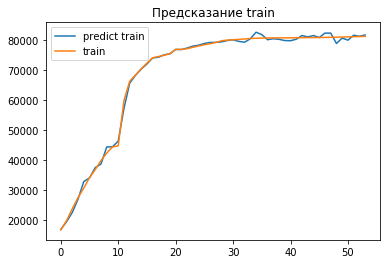

In [307]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_train, label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

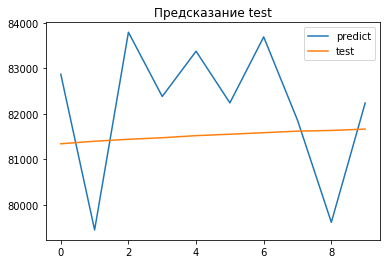

In [308]:
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

Вообще получилось хорошо :) - довольно точно

In [311]:
error_p =np.mean(np.abs(y_pred-y_test)/y_test)*100

print('error in MAPE :', error_p, '%')

error in MAPE : 1.7439064420273578 %
